## We covered a lot of information today and I'd like you to practice developing classification trees on your own. For each exercise, work through the problem, determine the result, and provide the requested interpretation in comments along with the code. The point is to build classifiers, not necessarily good classifiers (that will hopefully come later)

### 1. Load the iris dataset and create a holdout set that is 50% of the data (50% in training and 50% in test). Output the results (don't worry about creating the tree visual unless you'd like to) and discuss them briefly (are they good or not?)

In [2]:

import pandas as pd
%matplotlib inline
from sklearn import datasets
from pandas.tools.plotting import scatter_matrix

import matplotlib.pyplot as plt

/Users/Monica/.virtualenvs/dataanalysis/lib/python3.5/site-packages/matplotlib/__init__.py:1035: UserWarning: Duplicate key in file "/Users/Monica/.matplotlib/matplotlibrc", line #2
  (fname, cnt))


In [3]:

iris = datasets.load_iris() # loaded iris datasaet

In [4]:
iris

{'DESCR': 'Iris Plants Database\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ====================\n\n

In [5]:

from sklearn.cross_validation import train_test_split

In [6]:
x = iris.data[:,2:] # the attributes
y = iris.target # the target variable

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.5,train_size=0.5)

In [8]:
from sklearn import tree

In [9]:

dt = tree.DecisionTreeClassifier()

In [10]:

dt = dt.fit(x,y)


In [11]:

dt = dt.fit(x_train,y_train)

In [12]:
from sklearn import metrics

import numpy as np

def measure_performance(X,y,clf, show_accuracy=True, show_classification_report=True, show_confussion_matrix=True):
    y_pred=clf.predict(X)
    if show_accuracy:
        print("Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)),"\n")
    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y,y_pred),"\n")
    if show_confussion_matrix:
        print("Confusion matrix")
        print(metrics.confusion_matrix(y,y_pred),"\n")

In [13]:
measure_performance(x_test,y_test,dt) #measure on the test data (rather than train)

Accuracy:0.973 

Classification report
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        28
          1       0.90      1.00      0.95        19
          2       1.00      0.93      0.96        28

avg / total       0.98      0.97      0.97        75
 

Confusion matrix
[[28  0  0]
 [ 0 19  0]
 [ 0  2 26]] 



In [14]:

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(iris.target_names))
    plt.xticks(tick_marks, iris.target_names, rotation=45)
    plt.yticks(tick_marks, iris.target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [15]:

y_pred = dt.fit(x_train, y_train).predict(x_test) #generate a prediction based on the model created to output a predicted y

Confusion matrix, without normalization
[[28  0  0]
 [ 0 19  0]
 [ 0  2 26]]


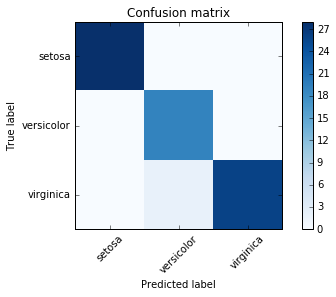

In [16]:
cm = metrics.confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

### 2. Redo the model with a 75% - 25% training/test split and compare the results. Are they better or worse than before? Discuss why this may be.

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,train_size=0.75)

In [18]:
measure_performance(x_test,y_test,dt) 

Accuracy:1.000 

Classification report
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        15
          1       1.00      1.00      1.00        10
          2       1.00      1.00      1.00        13

avg / total       1.00      1.00      1.00        38
 

Confusion matrix
[[15  0  0]
 [ 0 10  0]
 [ 0  0 13]] 



### 3. Load the breast cancer dataset (`datasets.load_breast_cancer()`) and perform basic exploratory analysis. What attributes to we have? What are we trying to predict?
For context of the data, see the documentation here: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

In [19]:
breast_cancer = datasets.load_breast_cancer() #

In [20]:
breast_cancer.keys()

dict_keys(['target', 'feature_names', 'data', 'target_names', 'DESCR'])

In [25]:
print(breast_cancer['DESCR']) # prints description of data

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)
        
        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.
 

In [21]:
print(breast_cancer)

{'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
 

In [22]:
x = breast_cancer.data[:,2:] # the attributes
y = iris.target # the target variable

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.5,train_size=0.5)

ValueError: Found arrays with inconsistent numbers of samples: [150 569]

### 4. Using the breast cancer data, create a classifier to predict the type of seed. Perform the above hold out evaluation (50-50 and 75-25) and discuss the results.